In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [81]:
dat=pd.read_csv("D:\DS videos\data\data\data\Mall_Customers.csv")

In [82]:
dat.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
dat.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [84]:
dat.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [85]:
dat.shape

(200, 5)

In [86]:
dat.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

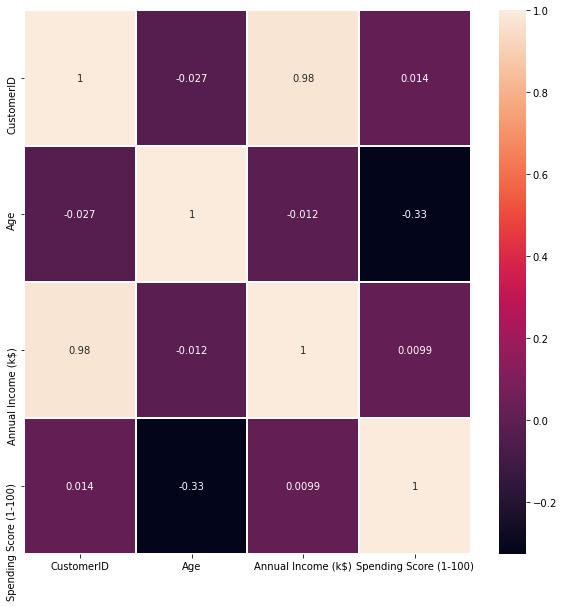

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(dat.corr(), annot=True, linewidth=1)

In [88]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
dat["Gender"]=Label.fit_transform(dat["Gender"])

In [89]:
dat.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [90]:
x=dat.iloc[:,[3,4]].values
#X = dataset.iloc[:, [3, 4]].values


In [91]:
x.flatten()

array([ 15,  39,  15,  81,  16,   6,  16,  77,  17,  40,  17,  76,  18,
         6,  18,  94,  19,   3,  19,  72,  19,  14,  19,  99,  20,  15,
        20,  77,  20,  13,  20,  79,  21,  35,  21,  66,  23,  29,  23,
        98,  24,  35,  24,  73,  25,   5,  25,  73,  28,  14,  28,  82,
        28,  32,  28,  61,  29,  31,  29,  87,  30,   4,  30,  73,  33,
         4,  33,  92,  33,  14,  33,  81,  34,  17,  34,  73,  37,  26,
        37,  75,  38,  35,  38,  92,  39,  36,  39,  61,  39,  28,  39,
        65,  40,  55,  40,  47,  40,  42,  40,  42,  42,  52,  42,  60,
        43,  54,  43,  60,  43,  45,  43,  41,  44,  50,  44,  46,  46,
        51,  46,  46,  46,  56,  46,  55,  47,  52,  47,  59,  48,  51,
        48,  59,  48,  50,  48,  48,  48,  59,  48,  47,  49,  55,  49,
        42,  50,  49,  50,  56,  54,  47,  54,  54,  54,  53,  54,  48,
        54,  52,  54,  42,  54,  51,  54,  55,  54,  41,  54,  44,  54,
        57,  54,  46,  57,  58,  57,  55,  58,  60,  58,  46,  5

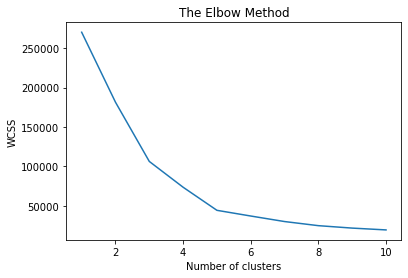

In [92]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # to see how far the points within the cluster are
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
kmeansnew=KMeans(n_clusters=3)

In [94]:
y_kmeans=kmeansnew.fit_predict(x)

In [95]:
kmeansnew.cluster_centers_

array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

In [96]:
kmeansnew.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

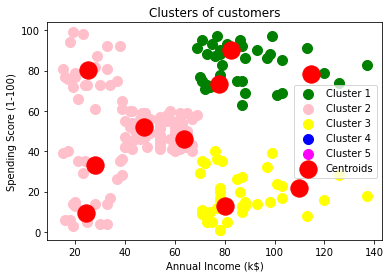

In [103]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
